In [1]:
from Parser import parse_frames
from scipy.signal import medfilt
import numpy as np
import math
import matplotlib.pyplot as plt

# Need a folder with npy compressed files of videos


Processing...
Videos from folder: bicepvid
Angles between upper arm and trunk
Max angle: 22.753788286131332
Min angle: 7.259297841407763


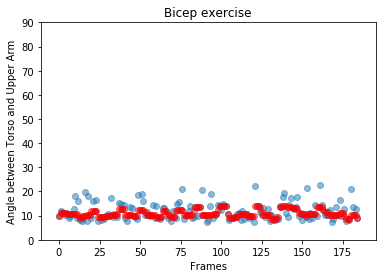

Angles between upper arm and forearm
Max angle: 179.77719021812985
Min angle: 0.024337694355760033


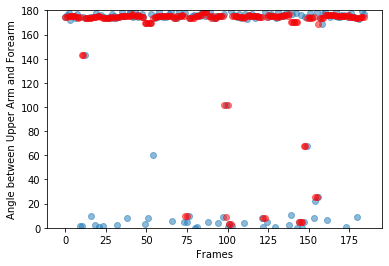

In [28]:
# modify this path for other videos 
input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
frame_poses = parse_frames(input_folder)

"""
# Detecting sides 

for posture in frame_poses:
    rside = [posture['RSHOULDER'], posture['RELBOW'], posture['RWRIST']
    lside = ...
"""

# Computing angles
trunk_vects = []
upArm_forearm_angles = [] 
upArm_trunk_angles = []
rside_upArm_vects = []
rside_forearm_vects = []
lside_upArm_vects = []
lside_forearm_vects = []



# Return unit vector
def unit_vector(vect):
    return vect / np.linalg.norm(vect)

# Calcute angle between vectors
def calc_angle(vect1, vect2):
    unit_vect1 = unit_vector(vect1)
    unit_vect2 = unit_vector(vect2)
    return math.degrees(np.arccos(np.clip(np.dot(unit_vect1, unit_vect2), -1.0, 1.0)))


for posture in frame_poses:
    # rside_joints = [posture['RSHOULDER'], posture['RELBOW'], posture['RWRIST'], posture['MIDHIP']]
    # lside_joints = [posture['LSHOULDER'], posture['LELBOW'], posture['LWRIST'], posture['MIDHIP']]
    
    # upper arm 
    # [0] - x; [1] - y, [2] - c
    lside_upArm_vect = [posture.joint_keypoints['LSHOULDER'][0] - posture.joint_keypoints['LELBOW'][0], posture.joint_keypoints['LSHOULDER'][1] - posture.joint_keypoints['LELBOW'][1]]
    lside_upArm_vects.append(lside_upArm_vect)
    
    
    # repeat for left side..
    
    # trunk
    trunk_vect = [posture.joint_keypoints['NECK'][0] - posture.joint_keypoints['MIDHIP'][0], posture.joint_keypoints['NECK'][1] - posture.joint_keypoints['MIDHIP'][1]]
    trunk_vects.append(trunk_vect)
    
    # Upper arm and trunk angle
    # convert to unit vectors
    lside_upArm_vect = unit_vector(lside_upArm_vect)
    trunk_vect = unit_vector(trunk_vect)
    
    # Calculate angle and add to list
    upArm_trunk_angles.append(calc_angle(lside_upArm_vect, trunk_vect))
    
    # forearm
    lside_forearm_vect = [posture.joint_keypoints['LWRIST'][0] - posture.joint_keypoints['LELBOW'][0], posture.joint_keypoints['LWRIST'][1] - posture.joint_keypoints['LELBOW'][1]]
    lside_forearm_vects.append(lside_forearm_vect)
    
    lside_forearm_vect = unit_vector(lside_forearm_vect)
    upArm_forearm_angles.append(calc_angle(lside_upArm_vect, lside_forearm_vect))
    
# for now use medfilt
# might use Kalman filter or something later instead
lside_upArm_vects = np.array(lside_upArm_vects)
trunk_vects = np.array(trunk_vects)
upArm_trunk_angles = np.array(upArm_trunk_angles)
upArm_trunk_angles_filtered = medfilt(upArm_trunk_angles, 5)
upArm_trunk_angles_filtered = medfilt(upArm_trunk_angles_filtered, 5)
upArm_forearm_angles = np.array(upArm_forearm_angles)
upArm_forearm_angles_filtered = medfilt(upArm_forearm_angles, 5)
upArm_forearm_angles_filtered = medfilt(upArm_forearm_angles, 5)
    
print("Angles between upper arm and trunk\nMax angle: " + str(np.max(upArm_trunk_angles)) + "\nMin angle: " + str(np.min(upArm_trunk_angles)))

# plot 
plt.scatter(np.arange(upArm_trunk_angles.shape[0]),upArm_trunk_angles, alpha=0.5)
plt.scatter(np.arange(upArm_trunk_angles_filtered.shape[0]),upArm_trunk_angles_filtered, c='r', alpha=0.5)
plt.title("Bicep exercise")
plt.xlabel('Frames')
plt.ylabel('Angle between Torso and Upper Arm')
# Set range on y-axis so the plots are consistent
plt.ylim(0,90) 
plt.show()

print("Angles between upper arm and forearm\nMax angle: " + str(np.max(upArm_forearm_angles)) + "\nMin angle: " + str(np.min(upArm_forearm_angles)))
plt.scatter(np.arange(upArm_forearm_angles.shape[0]),upArm_forearm_angles, alpha=0.5)
plt.scatter(np.arange(upArm_forearm_angles_filtered.shape[0]),upArm_forearm_angles_filtered, c='r', alpha=0.5)
plt.xlabel('Frames')
plt.ylabel('Angle between Upper Arm and Forearm')
# Set range on y-axis so the plots are consistent
plt.ylim(0,180) 
plt.show()
   